In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load data

In [8]:
Dict = dict(np.load('./Data/Fig_4_data.npy', allow_pickle=True).item())

### Fitting data

In [9]:
Rounds = np.array([1, 3, 6, 10, 25, 50])
n_shots = 75056
n_rounds = Rounds[-1]
_Rounds = (np.arange(n_rounds)+1)

defect_rate_0 = Dict['Deffect_rate_normal']
defect_rate_1 = Dict['Deffect_rate_LRU_data']
defect_rate_2 = Dict['Deffect_rate_LRU_ancilla']
defect_rate_3 = Dict['Deffect_rate_LRU_data_ancilla']

population_f_0 = Dict['Population_f_normal']
population_f_1 = Dict['Population_f_LRU_data']
population_f_2 = Dict['Population_f_LRU_ancilla']
population_f_3 = Dict['Population_f_LRU_data_ancilla']

population_h_0 = Dict['Population_h_normal']
population_h_1 = Dict['Population_h_LRU_data']
population_h_2 = Dict['Population_h_LRU_ancilla']
population_h_3 = Dict['Population_h_LRU_data_ancilla']

# Fit leakage curves
from scipy.optimize import curve_fit
def _func(x, l, s): # Eq. J5 from Varbanov, et al.
    return (1-np.exp(-x*(s+l)))*l/(l+s)

_rounds = np.linspace(1,50, 50)
popt_0_D1, pcov_0_D1 = curve_fit(_func, Rounds, population_f_0['D4'], bounds=((0,0), (1,1)))
popt_1_D1, pcov_1_D1 = curve_fit(_func, Rounds, population_f_1['D4'], bounds=((0,0), (1,1)))
popt_2_D1, pcov_2_D1 = curve_fit(_func, Rounds, population_f_2['D4'], bounds=((0,0), (1,1)))
popt_3_D1, pcov_3_D1 = curve_fit(_func, Rounds, population_f_3['D4'], bounds=((0,0), (1,1)))

popt_0_D2, pcov_0_D2 = curve_fit(_func, Rounds[2:], population_f_0['D7'][2:], bounds=((0,0), (1,1)))
popt_1_D2, pcov_1_D2 = curve_fit(_func, Rounds[2:], population_f_1['D7'][2:], bounds=((0,0), (1,1)))
popt_2_D2, pcov_2_D2 = curve_fit(_func, Rounds[2:], population_f_2['D7'][2:], bounds=((0,0), (1,1)))
popt_3_D2, pcov_3_D2 = curve_fit(_func, Rounds[2:], population_f_3['D7'][2:], bounds=((0,0), (1,1)))

### Plot

Text(0, 0.5, 'Detection probablity')

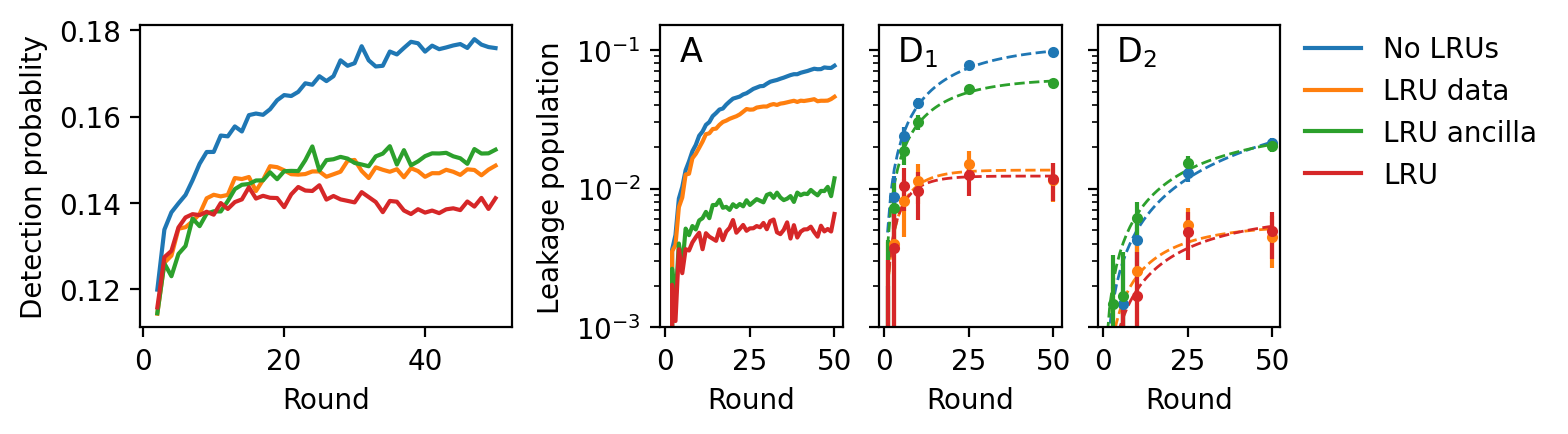

In [10]:
fig, axs = plt.subplots(figsize=(5*.8,2.5*.8), ncols=3, dpi=200, sharey=True)

axs[0].plot(_Rounds, (population_f_0['Z3']+population_h_0['Z3']), '-', color='C0', label='No LRUs')
axs[0].plot(_Rounds, (population_f_1['Z3']+population_h_1['Z3']), '-', color='C1', label='LRU data')
axs[0].plot(_Rounds, (population_f_2['Z3']+population_h_2['Z3']), '-', color='C2', label='LRU ancilla')
axs[0].plot(_Rounds, (population_f_3['Z3']+population_h_3['Z3']), '-', color='C3', label='LRU')

axs[1].plot(_rounds, _func(_rounds, *popt_0_D1), f'C0--', lw=1)
axs[1].plot(_rounds, _func(_rounds, *popt_1_D1), f'C1--', lw=1)
axs[1].plot(_rounds, _func(_rounds, *popt_2_D1), f'C2--', lw=1)
axs[1].plot(_rounds, _func(_rounds, *popt_3_D1), f'C3--', lw=1)
axs[1].errorbar(Rounds, population_f_0['D4'], yerr=1/np.sqrt(n_shots), fmt='.', color='C0', label='No LRUs')
axs[1].errorbar(Rounds, population_f_1['D4'], yerr=1/np.sqrt(n_shots), fmt='.', color='C1', label='LRU data')
axs[1].errorbar(Rounds, population_f_2['D4'], yerr=1/np.sqrt(n_shots), fmt='.', color='C2', label='LRU ancilla')
axs[1].errorbar(Rounds, population_f_3['D4'], yerr=1/np.sqrt(n_shots), fmt='.', color='C3', label='LRU')

axs[2].plot(_rounds, _func(_rounds, *popt_0_D2), f'C0--', lw=1)
axs[2].plot(_rounds, _func(_rounds, *popt_1_D2), f'C1--', lw=1)
axs[2].plot(_rounds, _func(_rounds, *popt_2_D2), f'C2--', lw=1)
axs[2].plot(_rounds, _func(_rounds, *popt_3_D2), f'C3--', lw=1)
axs[2].errorbar(Rounds[:], population_f_0['D7'][:], yerr=0.5/np.sqrt(n_shots), fmt='.', color='C0', label='No LRUs')
axs[2].errorbar(Rounds[:], population_f_1['D7'][:], yerr=0.5/np.sqrt(n_shots), fmt='.', color='C1', label='LRU data')
axs[2].errorbar(Rounds[:], population_f_2['D7'][:], yerr=0.5/np.sqrt(n_shots), fmt='.', color='C2', label='LRU ancilla')
axs[2].errorbar(Rounds[:], population_f_3['D7'][:], yerr=0.5/np.sqrt(n_shots), fmt='.', color='C3', label='LRU')

for i in range(3):
    axs[i].set_xticks([0, 25, 50])
    axs[i].set_ylim(bottom=1e-3, top=.15)
    axs[i].set_xlabel('Round')
    axs[i].set_yscale('log')

axs[0].set_ylabel('Leakage population')
axs[0].legend(frameon=False, bbox_to_anchor=(3.4, 1.05), loc=2)

axs[0].text(.1, .88, '$\mathrm{A}$', transform=axs[0].transAxes, size=12)
axs[1].text(.1, .88, '$\mathrm{D_1}$', transform=axs[1].transAxes, size=12)
axs[2].text(.1, .88, '$\mathrm{D_2}$', transform=axs[2].transAxes, size=12)

axs = list(axs)
axs.append(fig.add_subplot(111))
_pos = axs[3].get_position()
_pos = [_pos.x0-.65, _pos.y0, _pos.width*.6, _pos.height]
axs[3].set_position(_pos)
axs[3].plot(_Rounds[1:], np.array(defect_rate_0[1:]), '-', color='C0', label='No LRUs')
axs[3].plot(_Rounds[1:], np.array(defect_rate_1[1:]), '-', color='C1', label='LRU data')
axs[3].plot(_Rounds[1:], np.array(defect_rate_2[1:]), '-', color='C2', label='LRU ancilla')
axs[3].plot(_Rounds[1:], np.array(defect_rate_3[1:]), '-', color='C3', label='LRU both')

axs[3].set_xlabel('Round')
axs[3].set_ylabel('Detection probablity')

